<a href="https://colab.research.google.com/github/ramzesssina/ML---labi/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

МЛ практика 7. Финализация умений
Цель занятия:
# Изучить задачу снижения размерности, познакомиться с более продвинутыми метриками качества, изучение объекта Pipeline из scikit-learn, поиск лучших метрик. **Текст, выделенный полужирным шрифтом**

Задание состоит из следующих частей:
Объект Pipeline
Метрики качества для решения задач классификации, регрессии
Снижение размерности
Поиск лучших метрик качества (GridSearch)
Домашка ⏰
Заюзать пайплайны для своиз данных
Сделать 2D,3D PCA (T-SNE). Визуалзиация + классификация/регрессия
Найти лучшую модель через GridSearch (задача на выбор или обе)
Сделать оценку с новыми метриками



In [118]:
!pip install pandas scikit-learn seaborn scipy

In [119]:
pip install catboost

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
df = pd.read_csv('/content/nba.csv')

In [121]:
df

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
df = pd.read_csv('/content/nba.csv')

gp_categories = [0, 20, 40, 60, 80, 100]
labels = [1, 2, 3, 4, 5]

df.GP = df.GP.astype('category')
df.MIN = df.MIN.astype('category')

df['GP'] = pd.cut(df['GP'], bins=gp_categories, labels=labels, include_lowest=True)

In [123]:
y_regression = df['3P%']
X_regression = df.copy().drop('3P%', axis=1).reindex()

y_classification = df['GP']
X_classification = df.copy().drop('GP', axis=1).reindex()

non = X_classification.dropna().index
X_classification = X_classification.loc[non]
y_classification = y_classification.loc[non]


In [124]:
X_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         1340 non-null   object  
 1   GP           1340 non-null   category
 2   MIN          1340 non-null   category
 3   PTS          1340 non-null   float64 
 4   FGM          1340 non-null   float64 
 5   FGA          1340 non-null   float64 
 6   FG%          1340 non-null   float64 
 7   3P Made      1340 non-null   float64 
 8   3PA          1340 non-null   float64 
 9   FTM          1340 non-null   float64 
 10  FTA          1340 non-null   float64 
 11  FT%          1340 non-null   float64 
 12  OREB         1340 non-null   float64 
 13  DREB         1340 non-null   float64 
 14  REB          1340 non-null   float64 
 15  AST          1340 non-null   float64 
 16  STL          1340 non-null   float64 
 17  BLK          1340 non-null   float64 
 18  TOV          1340 non-null  

**Pipeline
Что такое ColumnTransformer?
ColumnTransformer — это объект в scikit-learn, который позволяет применять разные трансформации к разным группам признаков (столбцов) в одном шаге.**

Пример кода:
```
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_columns),
    ('cat', OneHotEncoder(), categorical_columns)
])
```



Что такое Pipeline?
Pipeline — это объект в scikit-learn, который объединяет последовательность шагов обработки данных и обучения модели в единый процесс. Каждый шаг выполняется последовательно, начиная с предобработки данных и заканчивая обучением модели.

Каждый шаг состоит из имени и объекта ('step_name', transformer_or_model).
Все шаги, кроме последнего, должны быть трансформаторами (иметь методы fit и transform).
Последний шаг — это модель с методами fit и predict.

**Пример использования Pipeline**
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


```
# Создание пайплайна
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Масштабирование данных
    ('classifier', RandomForestClassifier(random_state=42))  # Обучение модели
])

# Обучение модели
pipeline.fit(X_train, y_train)

# Предсказания
y_pred = pipeline.predict(X_test)
```

In [125]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from catboost import CatBoostRegressor

In [130]:
# Выделение числовых и категориальных колонок
numerical_features_regression = X_regression.select_dtypes(include=['float64', 'int64']).columns
categorical_features_regression = X_regression.select_dtypes(include=['category']).columns

numerical_features_classification = X_classification.select_dtypes(include=['float64', 'int64']).columns
categorical_features_classification = X_classification.select_dtypes(include=['category']).columns

# Трансформер для регрессии
preprocessor_regression = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_regression),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_regression),
    ],
    verbose=True
)

# Трансформер для классификации
preprocessor_classification = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_classification),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_classification),
    ],
    verbose=True
)

# **Для регрессии**

In [132]:

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np
from catboost import CatBoostRegressor

# Разделение данных
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42
)

CatBoostModel = CatBoostRegressor(iterations=1000, learning_rate=0.085, depth=6, verbose=0, random_seed=42, early_stopping_rounds=100)

# Пайплайн для регрессии
regression_pipeline = Pipeline([
    ('preprocessor', preprocessor_regression),  # Включает StandardScaler и OneHotEncoder
    ('regressor', CatBoostModel) # Модель CatBoost
], verbose=True)

non = X_train_reg.dropna().index
X_train_reg = X_train_reg.loc[non]
y_train_reg = y_train_reg.loc[non]

# Обучение модели
regression_pipeline.fit(X_train_reg, y_train_reg)

# Предсказания
y_pred_reg = regression_pipeline.predict(X_test_reg)

# Метрики для регрессии
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_reg, y_pred_reg)

print(f"\nСреднеквадратичная ошибка (MSE): {mse:.4f}")
print(f"Корень из MSE (RMSE): {rmse:.4f}")
print(f"Средний абсолютный процент ошибки (MAPE): {mape:.4f}, то есть {mape * 100:.4f}%")


[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing regressor, total=   5.9s

Среднеквадратичная ошибка (MSE): 119.5500
Корень из MSE (RMSE): 10.9339
Средний абсолютный процент ошибки (MAPE): 8103507326136422.0000, то есть 810350732613642240.0000%


**Пару слов о новых метриках**
**RMSE: Корень из среднеквадратичной ошибки (Root Mean Squared Error)**

**RMSE** — это метрика, которая измеряет среднее отклонение предсказанных значений от фактических в квадрате, а затем возвращает квадратный корень результата. Это позволяет интерпретировать ошибки в тех же единицах измерения, что и целевая переменная ( y ).

**Как работает RMSE?**
Вычисляет разницу между предсказанными и фактическими значениями.
Возводит каждую разницу в квадрат (чтобы ошибки не сокращались за счет их знака).
Находит среднее значение квадратов ошибок.
Берет квадратный корень, чтобы вернуть метрику в исходные единицы.
**Особенности RMSE:**
Чувствительность к большим ошибкам: RMSE сильнее наказывает крупные отклонения, чем, например, MAE.
Хорошо подходит для задач, где важны большие ошибки, и нужно их минимизировать.
Пример интерпретации:
Если RMSE равно 5, это означает, что в среднем предсказания модели отклоняются от фактических значений на 5 единиц.

**MAPE:** Средний абсолютный процент ошибки (Mean Absolute Percentage Error)
MAPE — это метрика, которая измеряет среднюю ошибку предсказаний в процентах относительно фактических значений. Она показывает, на сколько процентов в среднем модель ошибается в предсказаниях.

**Как работает MAPE?**
Вычисляет абсолютную разницу между предсказанными и фактическими значениями.
Делит каждую ошибку на фактическое значение.
Берет среднее значение этих долей и умножает на 100, чтобы выразить в процентах.
Особенности MAPE:
Легко интерпретируется: "Наша модель ошибается в среднем на X%".
Не учитывает направление ошибки (переоценка или недооценка).
Чувствительна к малым значениям целевой переменной: если истинное значение близко к нулю, MAPE может стать крайне высокой.
Пример интерпретации:
Если MAPE равно ( 10 %), это означает, что модель в среднем ошибается на 10% от фактического значения.

In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss

# Разделение данных
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

# Пайплайн для классификации
classification_pipeline = Pipeline([
    ('preprocessor', preprocessor_classification),  # Включает StandardScaler и OneHotEncoder
    ('classifier', DecisionTreeClassifier(random_state=42))
], verbose=True)

# Обучение модели
classification_pipeline.fit(X_train_clf, y_train_clf)

# Предсказания
y_pred_clf = classification_pipeline.predict(X_test_clf)
y_pred_proba_clf = classification_pipeline.predict_proba(X_test_clf)

# Метрики для классификации
accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf, average='weighted')
recall = recall_score(y_test_clf, y_pred_clf, average='weighted')
f1 = f1_score(y_test_clf, y_pred_clf, average='weighted')
auc = roc_auc_score(y_test_clf, y_pred_proba_clf, multi_class='ovr', average='weighted')
logloss = log_loss(y_test_clf, y_pred_proba_clf)

print(f"Точность (accuracy): {accuracy:.4f}")
print(f"Точность (precision): {precision:.4f}")
print(f"Полнота (recall): {recall:.4f}")
print(f"F1-мера: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Логарифмическая потеря (log-loss): {logloss:.4f}")

[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s
Точность (accuracy): 0.4248
Точность (precision): 0.4191
Полнота (recall): 0.4248
F1-мера: 0.4209
AUC: 0.5848
Логарифмическая потеря (log-loss): 20.7319


# **Пример использования**
Попробуем визуализировать признаки в 2D и 3D пространстве алгоритмами PCA и T-SNE

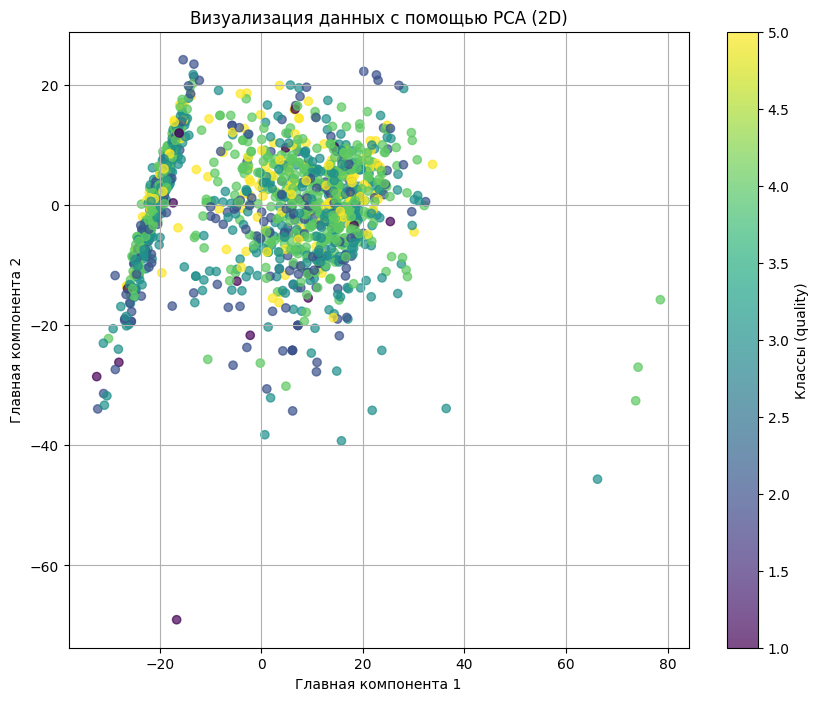

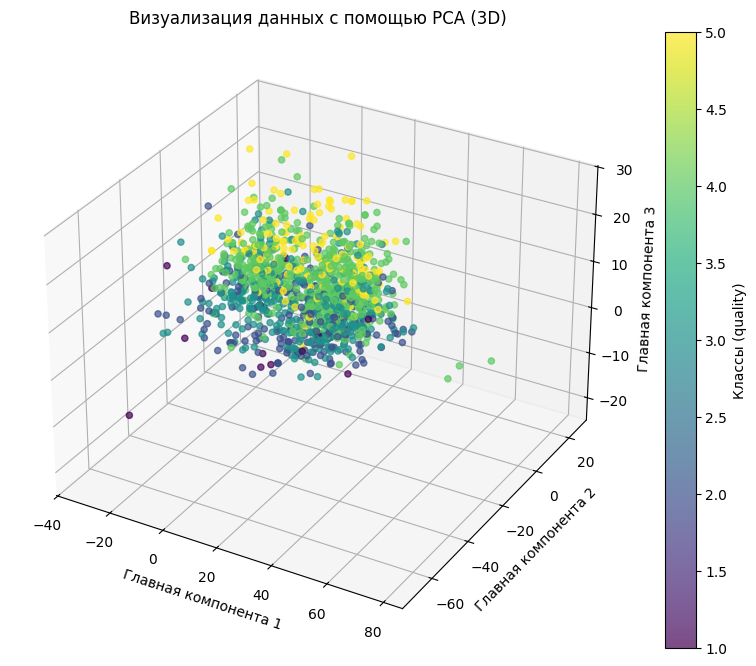

Точность классификации с PCA (2D): 0.3835
Точность классификации с PCA (3D): 0.4812


In [134]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

# Преобразование данных с помощью PCA
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_classification.select_dtypes(include=['float64', 'int64']))

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_classification.select_dtypes(include=['float64', 'int64']))

# 2D визуализация PCA
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_classification, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Классы (quality)')
plt.title("Визуализация данных с помощью PCA (2D)")
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.grid(True)
plt.show()

# 3D визуализация PCA
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y_classification, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Классы (quality)')
ax.set_title("Визуализация данных с помощью PCA (3D)")
ax.set_xlabel("Главная компонента 1")
ax.set_ylabel("Главная компонента 2")
ax.set_zlabel("Главная компонента 3")
plt.show()

# Классификация PCA (2D и 3D)
# Разделение данных
X_train_2d, X_test_2d, y_train, y_test = train_test_split(X_pca_2d, y_classification, test_size=0.2, random_state=42)
X_train_3d, X_test_3d = train_test_split(X_pca_3d, test_size=0.2, random_state=42)

# Модель
clf = RandomForestClassifier(random_state=42)

# Обучение на 2D данных
clf.fit(X_train_2d, y_train)
y_pred_2d = clf.predict(X_test_2d)
accuracy_2d = accuracy_score(y_test, y_pred_2d)
print(f"Точность классификации с PCA (2D): {accuracy_2d:.4f}")

# Обучение на 3D данных
clf.fit(X_train_3d, y_train)
y_pred_3d = clf.predict(X_test_3d)
accuracy_3d = accuracy_score(y_test, y_pred_3d)
print(f"Точность классификации с PCA (3D): {accuracy_3d:.4f}")


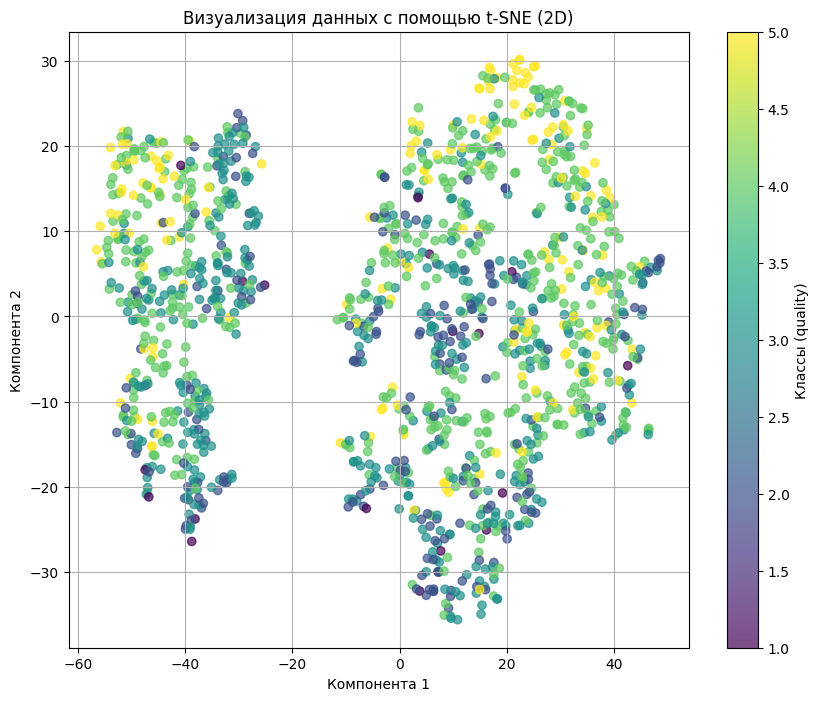

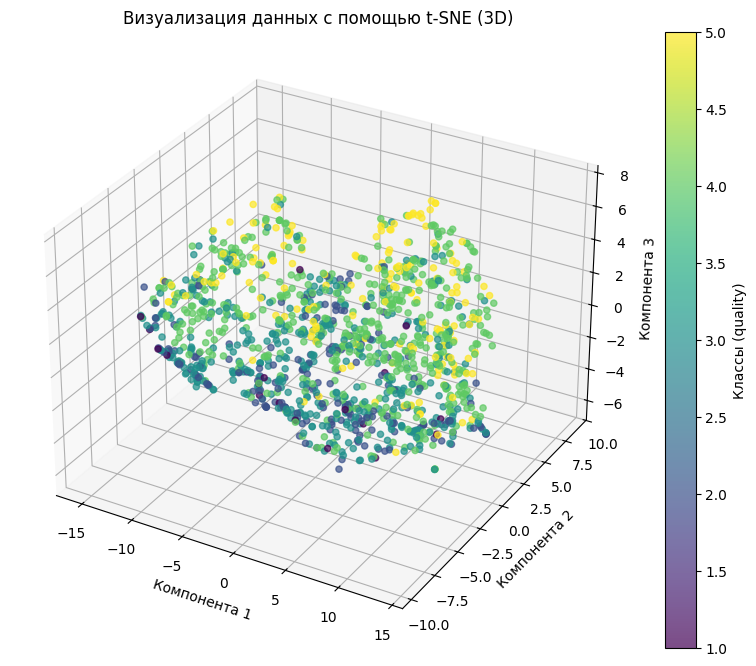

Точность классификации с t-SNE (2D): 0.5000
Точность классификации с t-SNE (3D): 0.4887


In [135]:
from sklearn.manifold import TSNE

# Преобразование данных с помощью t-SNE
tsne_2d = TSNE(n_components=2, random_state=42)
X_tsne_2d = tsne_2d.fit_transform(X_classification.select_dtypes(include=['float64', 'int64']))

tsne_3d = TSNE(n_components=3, random_state=42)
X_tsne_3d = tsne_3d.fit_transform(X_classification.select_dtypes(include=['float64', 'int64']))

# 2D визуализация t-SNE
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], c=y_classification, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Классы (quality)')
plt.title("Визуализация данных с помощью t-SNE (2D)")
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")
plt.grid(True)
plt.show()

# 3D визуализация t-SNE
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2], c=y_classification, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Классы (quality)')
ax.set_title("Визуализация данных с помощью t-SNE (3D)")
ax.set_xlabel("Компонента 1")
ax.set_ylabel("Компонента 2")
ax.set_zlabel("Компонента 3")
plt.show()

# Классификация t-SNE (2D и 3D)
# Разделение данных
X_train_2d, X_test_2d, y_train, y_test = train_test_split(X_tsne_2d, y_classification, test_size=0.2, random_state=42)
X_train_3d, X_test_3d = train_test_split(X_tsne_3d, test_size=0.2, random_state=42)

# Модель
clf = RandomForestClassifier(random_state=42)

# Обучение на 2D данных
clf.fit(X_train_2d, y_train)
y_pred_2d = clf.predict(X_test_2d)
accuracy_2d = accuracy_score(y_test, y_pred_2d)
print(f"Точность классификации с t-SNE (2D): {accuracy_2d:.4f}")

# Обучение на 3D данных
clf.fit(X_train_3d, y_train)
y_pred_3d = clf.predict(X_test_3d)
accuracy_3d = accuracy_score(y_test, y_pred_3d)
print(f"Точность классификации с t-SNE (3D): {accuracy_3d:.4f}")

# **А как видна идеальная картинка ? (БОНУС)**

In [136]:
from sklearn.datasets import load_digits

digest - датасет c "оттенками" серого визуализации чисел

In [137]:
# Загрузка данных
digits = load_digits()
X, y = digits.data, digits.target

# Фильтрация: только числа 1-9
mask = y != 0
X = X[mask]
y = y[mask]

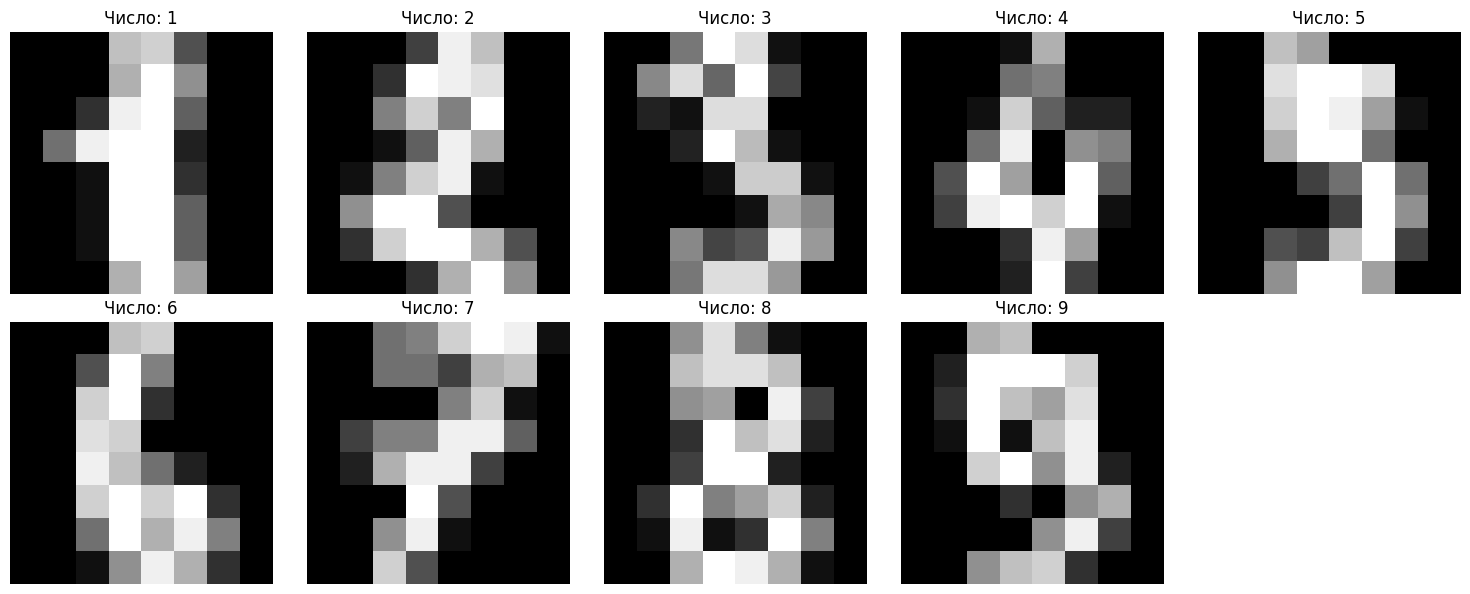

In [138]:
# Визуализация всех цифр 1-9
plt.figure(figsize=(15, 6))

unique_labels = list(range(1, 10))
for i, label in enumerate(unique_labels):
    # Найдем первое вхождение каждой цифры
    idx = (y == label).argmax()
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[idx].reshape(8, 8), cmap='gray', interpolation='nearest')
    plt.title(f"Число: {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [139]:
y

array([1, 2, 3, ..., 8, 9, 8])

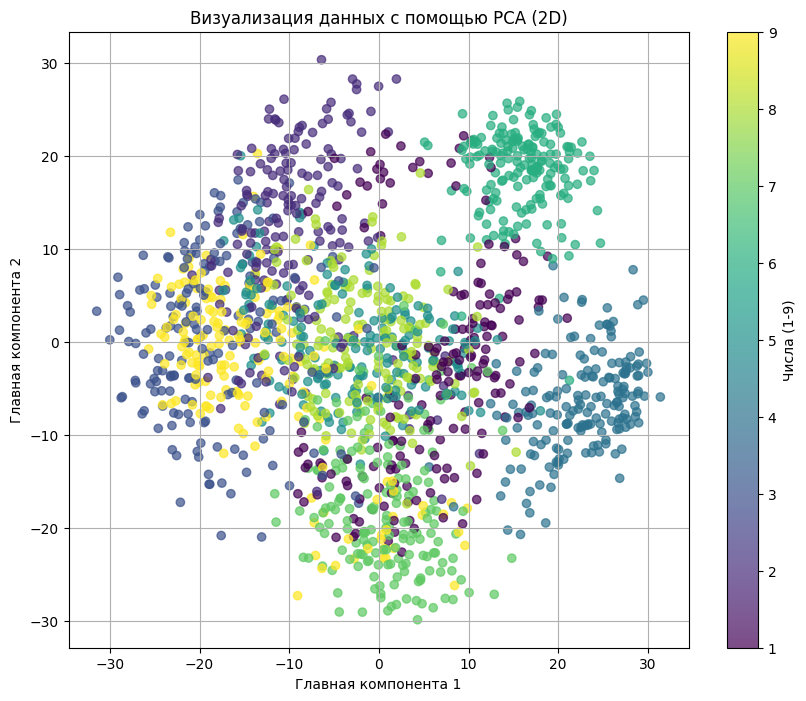

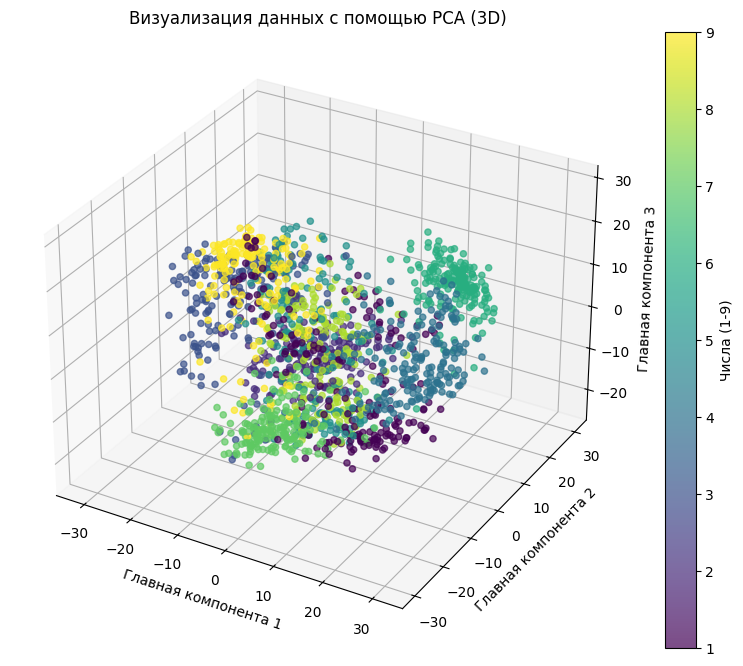

Точность классификации с PCA (2D): 0.5833
Точность классификации с PCA (3D): 0.7037


In [140]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# PCA: 2D
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Числа (1-9)')
plt.title("Визуализация данных с помощью PCA (2D)")
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.grid(True)
plt.show()

# PCA: 3D
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Числа (1-9)')
ax.set_title("Визуализация данных с помощью PCA (3D)")
ax.set_xlabel("Главная компонента 1")
ax.set_ylabel("Главная компонента 2")
ax.set_zlabel("Главная компонента 3")
plt.show()

# Классификация на основе PCA (2D)
X_train_2d, X_test_2d, y_train, y_test = train_test_split(X_pca_2d, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_2d, y_train)
y_pred_2d = clf.predict(X_test_2d)
accuracy_pca_2d = accuracy_score(y_test, y_pred_2d)
print(f"Точность классификации с PCA (2D): {accuracy_pca_2d:.4f}")

# Классификация на основе PCA (3D)
X_train_3d, X_test_3d = train_test_split(X_pca_3d, test_size=0.2, random_state=42)
clf.fit(X_train_3d, y_train)
y_pred_3d = clf.predict(X_test_3d)
accuracy_pca_3d = accuracy_score(y_test, y_pred_3d)
print(f"Точность классификации с PCA (3D): {accuracy_pca_3d:.4f}")

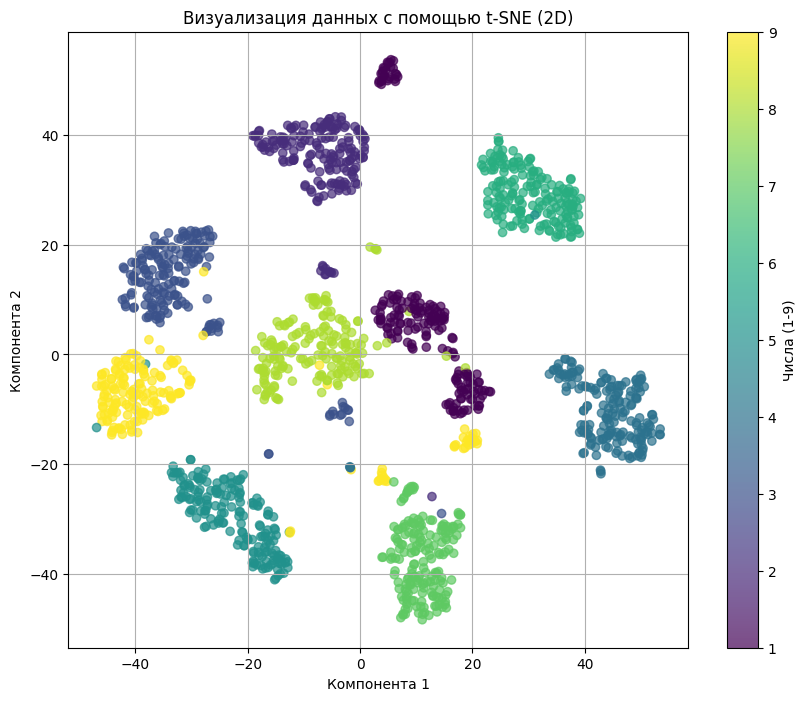

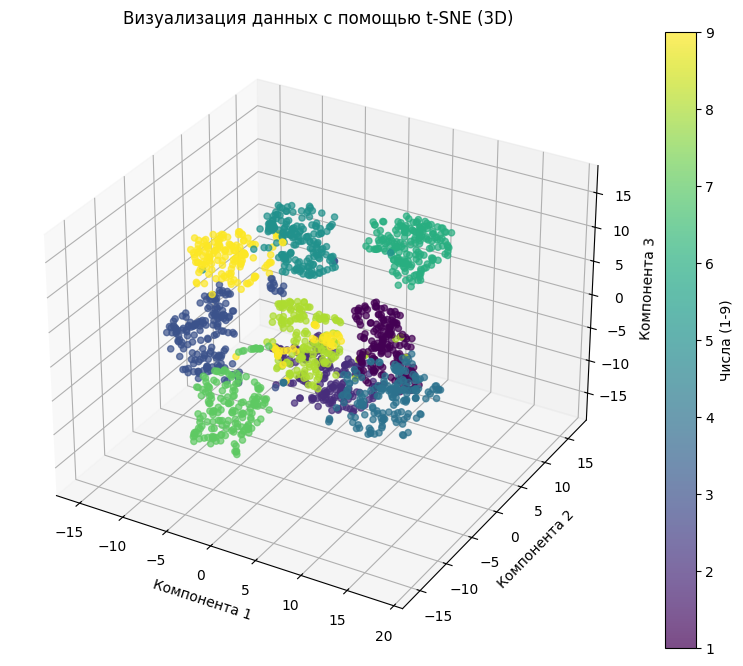

Точность классификации с t-SNE (2D): 0.9938
Точность классификации с t-SNE (3D): 0.9938


In [141]:
from sklearn.manifold import TSNE

# t-SNE: 2D
tsne_2d = TSNE(n_components=2, random_state=42)
X_tsne_2d = tsne_2d.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Числа (1-9)')
plt.title("Визуализация данных с помощью t-SNE (2D)")
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")
plt.grid(True)
plt.show()

# t-SNE: 3D
tsne_3d = TSNE(n_components=3, random_state=42)
X_tsne_3d = tsne_3d.fit_transform(X)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Числа (1-9)')
ax.set_title("Визуализация данных с помощью t-SNE (3D)")
ax.set_xlabel("Компонента 1")
ax.set_ylabel("Компонента 2")
ax.set_zlabel("Компонента 3")
plt.show()

# Классификация на основе t-SNE (2D)
X_train_tsne_2d, X_test_tsne_2d = train_test_split(X_tsne_2d, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_tsne_2d, y_train)
y_pred_tsne_2d = clf.predict(X_test_tsne_2d)
accuracy_tsne_2d = accuracy_score(y_test, y_pred_tsne_2d)
print(f"Точность классификации с t-SNE (2D): {accuracy_tsne_2d:.4f}")

# Классификация на основе t-SNE (3D)
X_train_tsne_3d, X_test_tsne_3d = train_test_split(X_tsne_3d, test_size=0.2, random_state=42)
clf.fit(X_train_tsne_3d, y_train)
y_pred_tsne_3d = clf.predict(X_test_tsne_3d)
accuracy_tsne_3d = accuracy_score(y_test, y_pred_tsne_3d)
print(f"Точность классификации с t-SNE (3D): {accuracy_tsne_3d:.4f}")

# **Поиск лучших параметров GridSearch и RandomSearch**

In [142]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
import numpy as np

# Определение параметров для поиска
param_grid_regression = {
    'regressor__alpha': [0.1, 1.0, 10.0]  # Параметры регуляризации для Ridge
}

param_random_regression = {
    'regressor__alpha': np.linspace(0.1, 10, 100)  # Диапазон для случайного поиска
}

# Пайплайн для регрессии
regression_pipeline = Pipeline([
    ('preprocessor', preprocessor_regression),
    ('regressor', Ridge())
], verbose=True)

# GridSearchCV для регрессии
grid_search_reg = GridSearchCV(regression_pipeline, param_grid=param_grid_regression, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_reg.fit(X_train_reg, y_train_reg)
print("\nЛучшие параметры (GridSearch) для регрессии:", grid_search_reg.best_params_)
print("Лучший MSE (GridSearch):", -grid_search_reg.best_score_)

# RandomizedSearchCV для регрессии
random_search_reg = RandomizedSearchCV(regression_pipeline, param_distributions=param_random_regression, n_iter=10, cv=5, scoring='neg_mean_squared_error', verbose=1, random_state=42)
random_search_reg.fit(X_train_reg, y_train_reg)
print("\nЛучшие параметры (RandomSearch) для регрессии:", random_search_reg.best_params_)
print("Лучший MSE (RandomSearch):", -random_search_reg.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing regressor, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing regressor, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing regressor, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransforme

In [144]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline

# Определение параметров для поиска
param_grid_classification = {
    'classifier__max_depth': [5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10]
}

param_random_classification = {
    'classifier__max_depth': np.arange(1, 20),
    'classifier__min_samples_split': np.arange(2, 20)
}

# Пайплайн для классификации
classification_pipeline = Pipeline([
    ('preprocessor', preprocessor_classification),
    ('classifier', DecisionTreeClassifier(random_state=42))
], verbose=True)

# GridSearchCV для классификации
grid_search_clf = GridSearchCV(classification_pipeline, param_grid=param_grid_classification, cv=5, scoring='accuracy', verbose=1)
grid_search_clf.fit(X_train_clf, y_train_clf)
print("\nЛучшие параметры (GridSearch) для классификации:", grid_search_clf.best_params_)
print("Лучшая точность (GridSearch):", grid_search_clf.best_score_)

# RandomizedSearchCV для классификации
random_search_clf = RandomizedSearchCV(classification_pipeline, param_distributions=param_random_classification, n_iter=10, cv=5, scoring='accuracy', verbose=1, random_state=42)
random_search_clf.fit(X_train_clf, y_train_clf)
print("\nЛучшие параметры (RandomSearch) для классификации:", random_search_clf.best_params_)
print("Лучшая точность (RandomSearch):", random_search_clf.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.1s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransforme

In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score




# Загрузка данных (предполагаем, что df уже загружен)
# Преобразование качества в бинарный признак
df['is_best_player'] = (df['GP'].astype(int) > 5).astype(int)

# Удаляем `quality` из данных
X = df.drop(columns=['GP', 'is_best_player'])
y = df['is_best_player']

# Разделение признаков на числовые и категориальные
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['category']).columns

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразование числовых данных
scaler = StandardScaler()
X_train_numeric = scaler.fit_transform(X_train[numeric_features])
X_test_numeric = scaler.transform(X_test[numeric_features])


# Преобразование категориальных данных
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_categorical = encoder.fit_transform(X_train[categorical_features]).toarray()
X_test_categorical = encoder.transform(X_test[categorical_features]).toarray()

# Объединение преобразованных данных
import numpy as np
X_train_transformed = np.hstack([X_train_numeric, X_train_categorical])
X_test_transformed = np.hstack([X_test_numeric, X_test_categorical])

# Определение параметров для RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Обучение RandomForestClassifier с RandomizedSearchCV
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42,
    verbose=1
)

random_search.fit(X_train_transformed, y_train)

# Лучшие параметры и точность
best_params = random_search.best_params_
best_score = random_search.best_score_

# Тестирование на отложенной выборке
y_pred = random_search.best_estimator_.predict(X_test_transformed)
test_accuracy = accuracy_score(y_test, y_pred)

print("\nЛучшие параметры:", best_params)
print(f"Лучшая точность на кросс-валидации: {best_score:.4f}")
print(f"Точность на тестовой выборке: {test_accuracy:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits

Лучшие параметры: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': False}
Лучшая точность на кросс-валидации: 1.0000
Точность на тестовой выборке: 1.0000
